# 2016.09.28 UNG: BULL CREDIT SPREAD


In [2]:
import sys
sys.path.append(r'E:\Datos\python\python35\Proyectos\Eclipse Workspace\options\src')
sys.path.append(r'E:\Datos\python\python35\Proyectos\Eclipse Workspace\PlotSignal\src')
sys.path.append(r'E:\Datos\python\python35\Proyectos\Eclipse Workspace\PrintPlot\src')
sys.path.append(r'E:\Datos\python\python35\Proyectos\Eclipse Workspace\PlotSignal\src')
sys.path.append(r'E:\Datos\python\python35\Proyectos\Eclipse Workspace\Options\src')
from PlotSignal.Csv_mngt import Csv_mngt
from  PlotSignal.PrintPlot import PrintPlot
from PlotSignal.PrintTrading import PrintTrading
import numpy as np
import mpld3
from datetime import datetime
from matplotlib.dates import  date2num
from Options.Value import Calculate
%matplotlib inline
mpld3.enable_notebook()

## BUY LEG

### ENTRY DATA BUY LEG

In [3]:
option_buy = '20160928 +UNG-161021P8.00'
option_path_buy='E:\\Datos\\bolsa\\cuenta personal\\analisis de valores\\Trades activos\\Scanning\\20160928\\20160928'
option_type = 'put'
strike_buy = 8
expiration = datetime(2016, 10, 21, 16, 0, 0)
premium_buy = 0.13
underlying_buy = 8.515
entry_date_buy = datetime(2016, 9, 28, 10, 46, 14)
trading_day_buy = entry_date_buy.date()
ticker = 'UNG'

In [4]:
# get data
csv = Csv_mngt()
csv.set_data(option_path_buy + '\\Opciones\\' + option_buy + '.txt',';')
bid_str = csv.extract_data_col('Bid Underlier')
bid_list = np.asarray([float(x.replace(',','.')) for x in bid_str])
ask_str = csv.extract_data_col('Ask Underlier')
ask_list = np.asarray([float(x.replace(',','.')) for x in ask_str])
target_str = csv.extract_data_col('Target')
clean_target_str = []
for each in target_str:
    if each:
        clean_target_str.append(each)
    else:
        clean_target_str.append('0')
target_list = np.asarray([float(x.replace(',','.')) for x in clean_target_str])
time_list = csv.date2num_list(csv.extract_data_col('Time'), '%H:%M:%S')-0.25 
time_list = time_list - int(time_list[0]) + date2num(trading_day_buy)
under_price = (bid_list + ask_list) / 2
premium_bid_str = csv.extract_data_col('Bid')
premium_bid = np.asarray([float(x.replace(',','.')) for x in premium_bid_str])
premium_ask_str = csv.extract_data_col('Ask')
premium_ask = np.asarray([float(x.replace(',','.')) for x in premium_ask_str])


### UNDERLYING BUY LEG

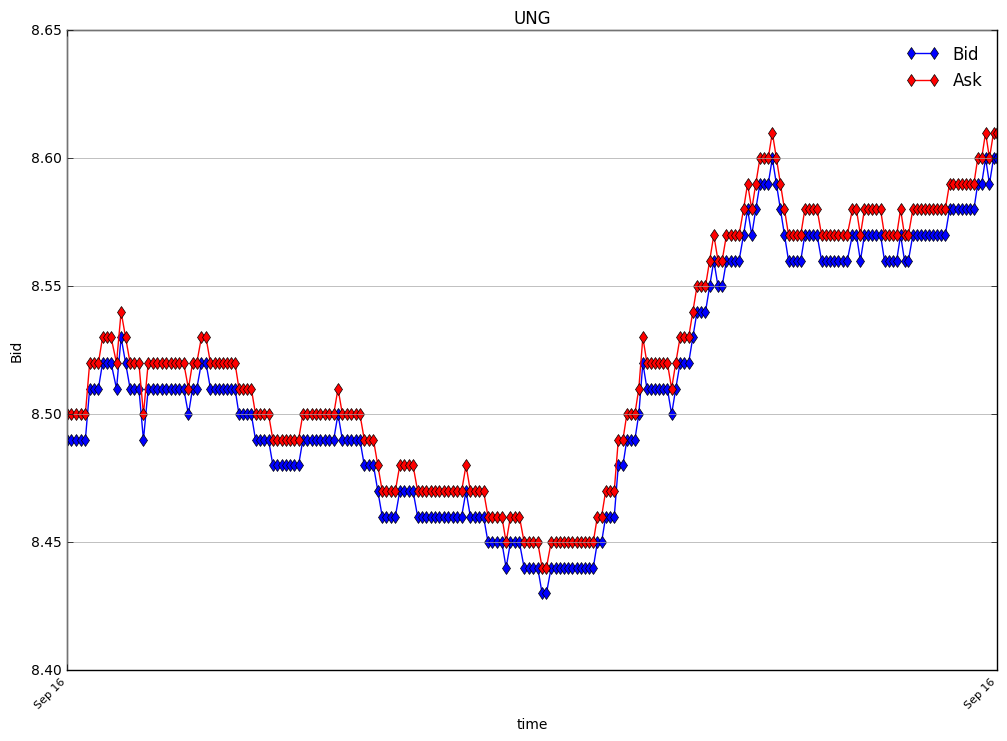

In [5]:

graph = PrintPlot(time_list, bid_list)
graph.init_plot(trace_type = 'bd-', data_name = 'Bid', x_name = 'time', fig_size = (12, 8), title_plot = ticker, log_y = False)
graph.append_trace(ask_list, 'rd-', 'Ask')
graph.show()


### TRADING BUY LEG

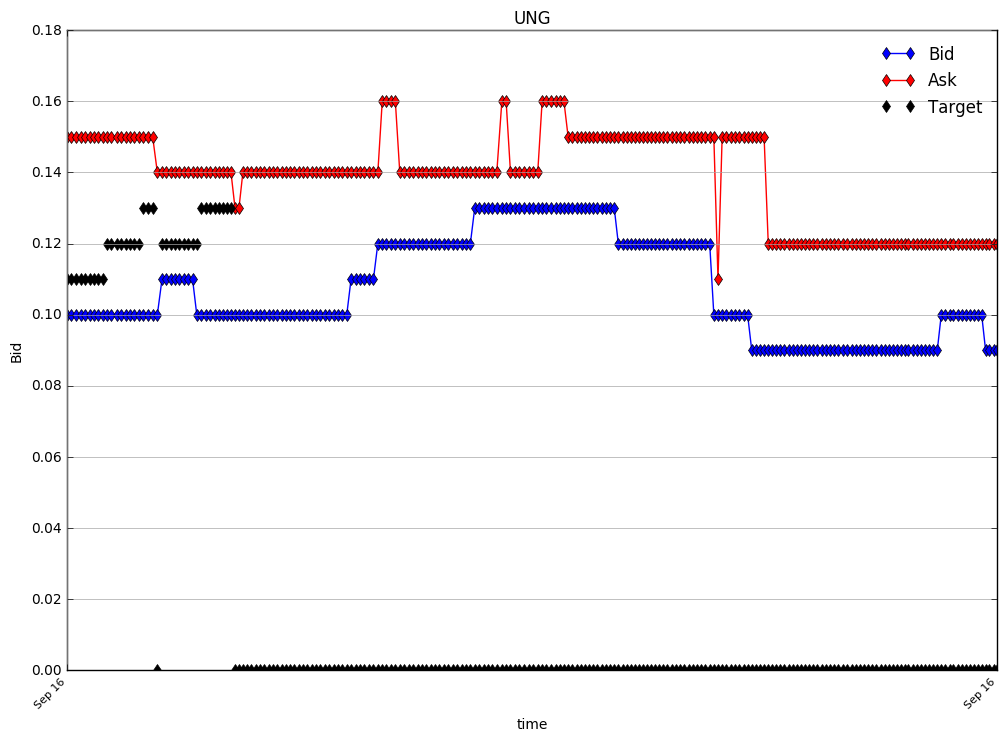

In [7]:
graph_trading_buy = PrintPlot(time_list, premium_bid)
graph_trading_buy.init_plot(trace_type = 'bd-', data_name = 'Bid', x_name = 'time', fig_size = (12, 8), title_plot = ticker, log_y = False)
graph_trading_buy.append_trace(premium_ask, 'rd-', 'Ask')
graph_trading_buy.append_trace(target_list, 'kd', 'Target')
graph_trading_buy.show()

### IMPLIED VOLATILITY BUY LEG

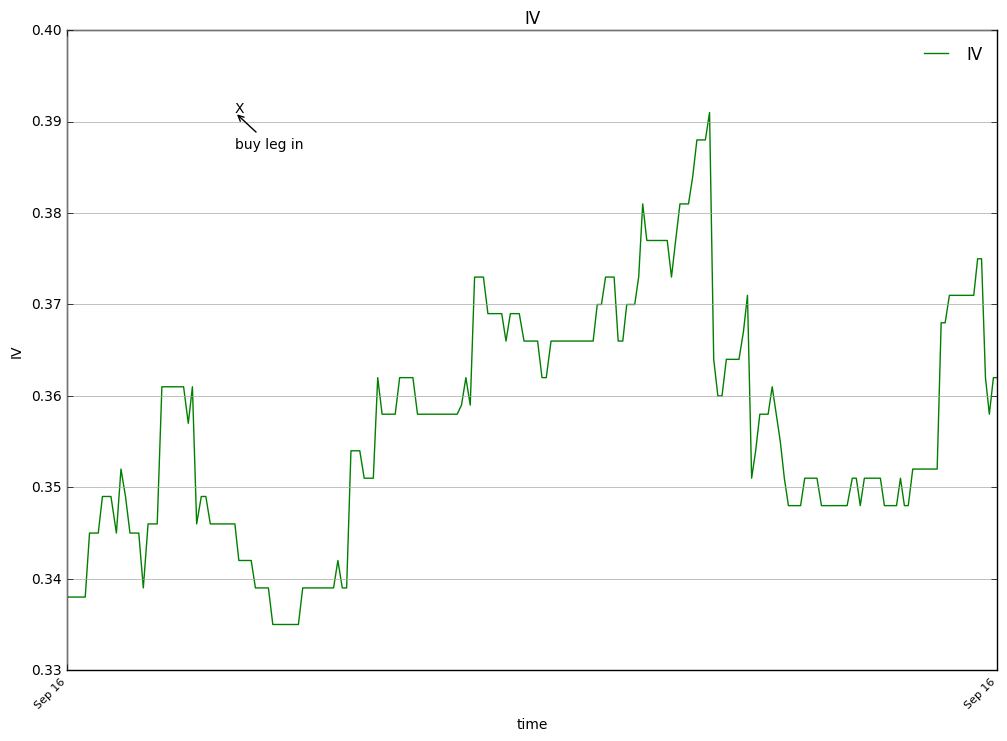

In [8]:
# buy leg implied volatility
graph_IV_buy = PrintTrading()
graph_IV_buy.print_IV(option_type, premium_bid, under_price, strike_buy,
                  time_list, expiration)
time_leg_IV_in = date2num(entry_date_buy)
time_to_exp = date2num(expiration)-date2num(entry_date_buy)
buy_leg_IV_in = Calculate().find_IV(option_type, premium_buy,
            underlying_buy, strike_buy, time_to_exp)
xy = (date2num(entry_date_buy), buy_leg_IV_in)
xy_text = (date2num(entry_date_buy), buy_leg_IV_in * 0.99)
graph_IV_buy.annotate('buy leg in', xy, xy_text)
graph_IV_buy.text('X', date2num(entry_date_buy), buy_leg_IV_in)
graph_IV_buy.show()


### IMPLIED VOLATILITY CALCULATED BUY LEG

In [9]:
# Buy_leg, IV
print('IV of buy leg in = ' + str(buy_leg_IV_in))


IV of buy leg in = 0.391


## WRITE LEG

   ### ENTRY DATA WRITE LEG

In [10]:
option_write = '20160928 +UNG-161021P9.00'
option_path_write='E:\\Datos\\bolsa\\cuenta personal\\analisis de valores\\Trades activos\\Scanning\\20160928\\20160928'
strike_write = 9
premium_write = -0.65
underlying_write = 8.465
entry_date_write = datetime(2016, 9, 28, 13, 24, 38)
trading_day_write = entry_date_write.date()

In [11]:
# get data
csv = Csv_mngt()
csv.set_data(option_path_write + '\\Opciones\\' + option_write + '.txt',';')
bid_str = csv.extract_data_col('Bid Underlier')
bid_list = np.asarray([float(x.replace(',','.')) for x in bid_str])
ask_str = csv.extract_data_col('Ask Underlier')
ask_list = np.asarray([float(x.replace(',','.')) for x in ask_str])
target_str = csv.extract_data_col('Target')
clean_target_str = []
for each in target_str:
    if each:
        clean_target_str.append(each)
    else:
        clean_target_str.append('0')
target_list = np.asarray([float(x.replace(',','.')) for x in clean_target_str])
time_list = csv.date2num_list(csv.extract_data_col('Time'), '%H:%M:%S')-0.25
time_list = time_list - int(time_list[0]) + date2num(trading_day_write)
under_price = (bid_list + ask_list) / 2
premium_bid_str = csv.extract_data_col('Bid')
premium_bid = np.asarray([float(x.replace(',','.')) for x in premium_bid_str])
premium_ask_str = csv.extract_data_col('Ask')
premium_ask = np.asarray([float(x.replace(',','.')) for x in premium_ask_str])

### UNDERLYING WRITE LEG

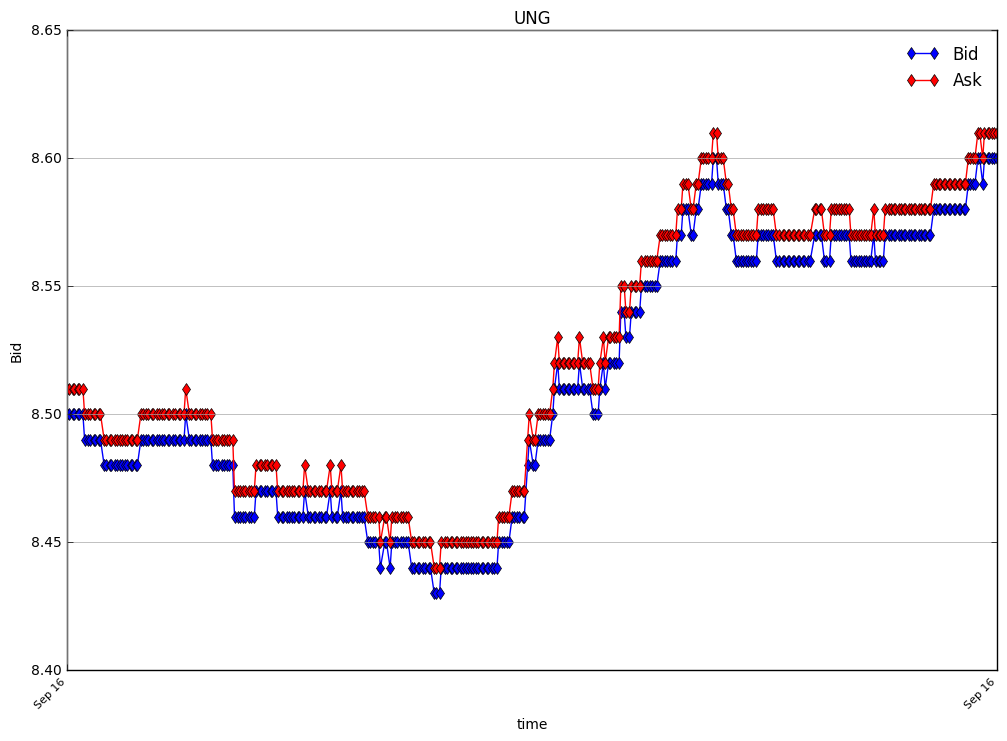

In [12]:
graph = PrintPlot(time_list, bid_list)
graph.init_plot(trace_type = 'bd-', data_name = 'Bid', x_name = 'time', fig_size = (12, 8), title_plot = ticker, log_y = False)
graph.append_trace(ask_list, 'rd-', 'Ask')
graph.show()


### TRADING WRITE LEG

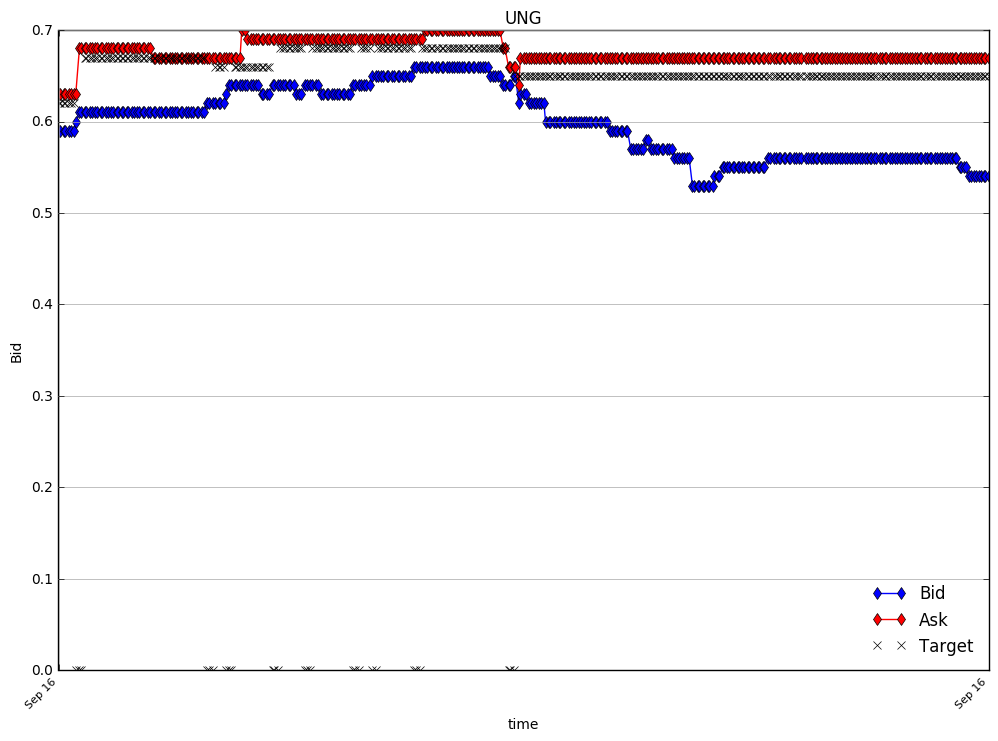

In [13]:
graph_trading_buy = PrintPlot(time_list, premium_bid)
graph_trading_buy.init_plot(trace_type = 'bd-', data_name = 'Bid', x_name = 'time', fig_size = (12, 8), title_plot = ticker, log_y = False)
graph_trading_buy.append_trace(premium_ask, 'rd-', 'Ask')
graph_trading_buy.append_trace(target_list, 'kx', 'Target')
graph_trading_buy.show()

### IMPLIED VOLATILITY WRITE LEG

0.361


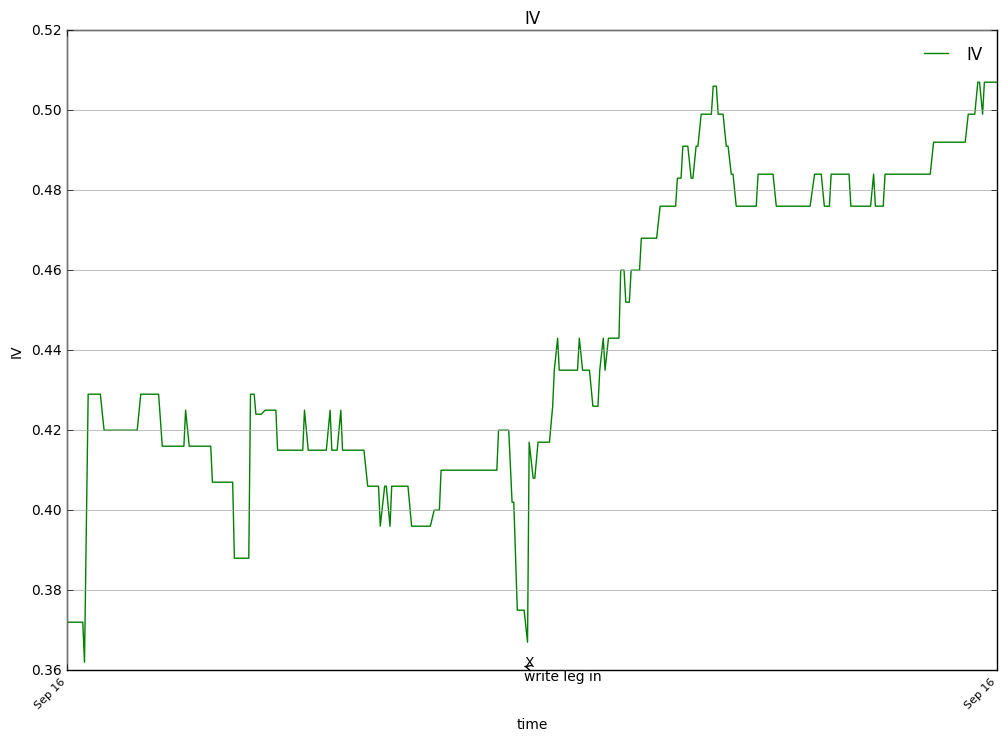

In [14]:
# buy leg implied volatility
graph_IV_write = PrintTrading()
graph_IV_write.print_IV(option_type, premium_ask, under_price, strike_write, time_list, expiration)
time_leg_IV_in = date2num(entry_date_write)
time_to_exp = date2num(expiration)-date2num(entry_date_write)
write_leg_IV_in = Calculate().find_IV(option_type, -premium_write, underlying_write, strike_write, time_to_exp)
xy = (date2num(entry_date_write), write_leg_IV_in)
xy_text = (date2num(entry_date_write), write_leg_IV_in * 0.99)
graph_IV_write.annotate('write leg in', xy, xy_text)
graph_IV_write.text('X', date2num(entry_date_write), write_leg_IV_in)
print(write_leg_IV_in)
graph_IV_write.show()

### IMPLIED VOLATILITY CALCULATED

In [15]:
# Write_leg, IV
print('IV of buy leg in = ' + str(buy_leg_IV_in))
print('IV of write leg in = ' + str(write_leg_IV_in))

IV of buy leg in = 0.391
IV of write leg in = 0.361
